<a href="https://colab.research.google.com/github/nikunjbhalla/diabetes_prediction/blob/main/Group7_DiabetesDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS1 – Diabetes Disease Prediction
**Group 007**:

* 2021fc04658 - Nikunj Bhalla
* 2021fc04662 - Vardhan Gupta
* 2021fc04984 - Vineet Chhabra

## Import Libraries/Dataset

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
# load the data set
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

## Data Visualization and Exploration



In [3]:
df.shape

(253680, 22)

File has 253680 rows of data and has 22 columns in it

### Sanity check of data set

In [4]:
# checking the type of columns
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [5]:
# print 2 rows of the total data to validate the data
pd.set_option('display.max_columns', None)
df.sample(2)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
176548,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
247751,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,5.0,6.0,7.0


In [6]:
# adding additional Diabetes column with class name for clarity in analysis
df['Diabetes'] = df['Diabetes_012'].replace({0.0:'no diabetes', 1.0:'prediabetes', 2.0:'diabetes'})

### Class Imbalance Check

Checking the distribution of target classes in the dataset. While would tell us if data is balanced or we have more occurences of dataset of one type of target class

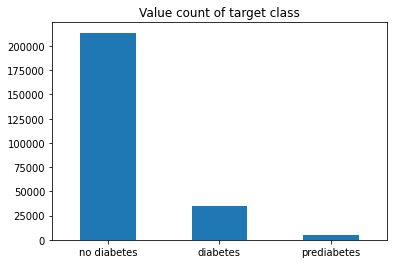

In [7]:
pd.value_counts(df['Diabetes']).plot(kind='bar', title='Value count of target class', rot=0)

In [8]:
df['Diabetes'].value_counts()

no diabetes    213703
diabetes        35346
prediabetes      4631
Name: Diabetes, dtype: int64

We have three target classes for diabetes and the data is distributed among them in **imbalanced** manner.
*   0 = no diabetes
*   1 = prediabetes
*   2 = diabetes

To fix this we can take help of over sampling, under sampling or synthetic data creation using techniques like SMOTE

### Visualize Data

In [9]:
# checking the distribution of dataset
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


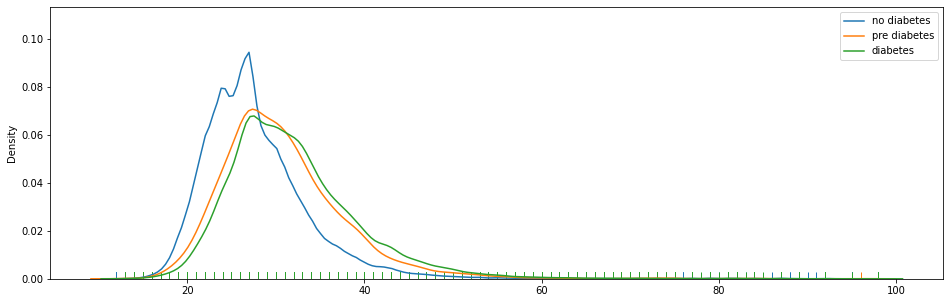

In [10]:
# plotting a dist plot here, to see the distribution of BMI in the dataset for all the target classes
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
target_0 = df.loc[df['Diabetes_012'] == 0]
target_1 = df.loc[df['Diabetes_012'] == 1]
target_2 = df.loc[df['Diabetes_012'] == 2]
sns.distplot(target_0[['BMI']], hist=False, rug=True, label="no diabetes")
sns.distplot(target_1[['BMI']], hist=False, rug=True, label="pre diabetes")
sns.distplot(target_2[['BMI']], hist=False, rug=True, label="diabetes")
plt.legend()
plt.show()

* From the above plot we can find data has a normal distribution of BMI in it. It is not skewed towards people with BMI of certain limits.
* Data set with *no diabetes* peak on lower range of BMI
* *pre diabetic or diabetic* behaviour are more spread towards higher BMI values
* Thus relation between ***high BMI and high chances of diabetes*** can be seen.

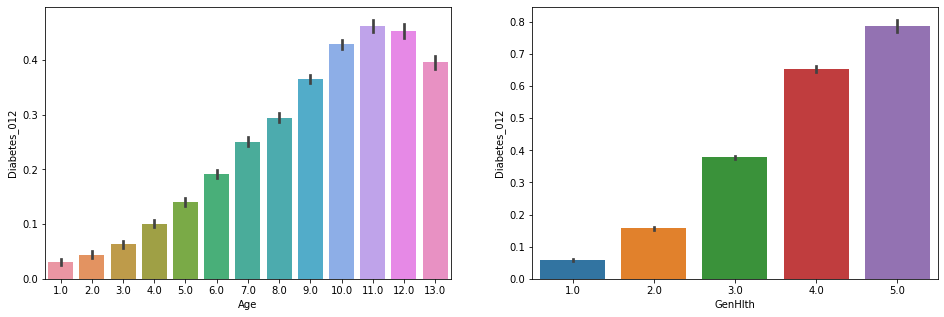

In [11]:
# checking for distribution of data with respect to Age and General health parameters

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x="Age", y="Diabetes_012", data=df)
plt.subplot(1,2,2)
sns.barplot(x="GenHlth", y="Diabetes_012", data=df)
plt.show()

* First plot, Age versus Diabetes, tells us that diabetes is more ***prevelant higher age brackets***.<br>
* Second plot, General Health vs Diabetes, tells a clear relation between ***depleting general health and diabetes***

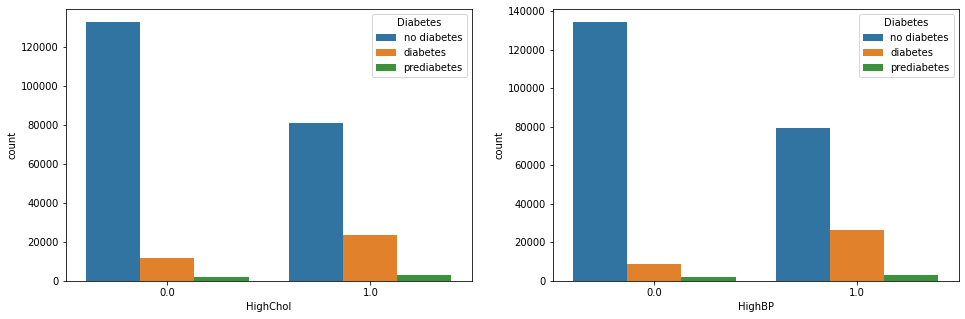

In [12]:
# checking for distribution of data with respect to HighBP and HighChol health parameters

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(x="HighChol", hue="Diabetes", data=df)
plt.subplot(1,2,2)
sns.countplot(x="HighBP", hue="Diabetes", data=df)
plt.show()

* Both the plots conclude higher values of HighBP and HighChol in people with diabetes, thus displaying a strong correlation

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

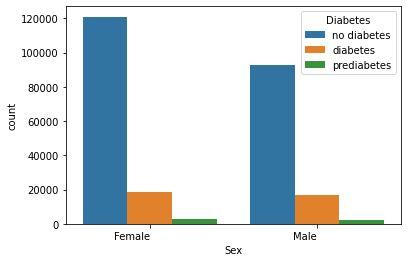

In [13]:
ax = sns.countplot(x="Sex", data=df, hue='Diabetes')
ax.set_xticklabels(['Female', 'Male'], ha="right")

In [14]:
df['Sex'].value_counts()

0.0    141974
1.0    111706
Name: Sex, dtype: int64

In [15]:
df_grouped_sex = pd.crosstab(df["Diabetes"], df["Sex"])
df_grouped_sex

Sex,0.0,1.0
Diabetes,,
diabetes,18411,16935
no diabetes,120959,92744
prediabetes,2604,2027


### Corelation Analysis

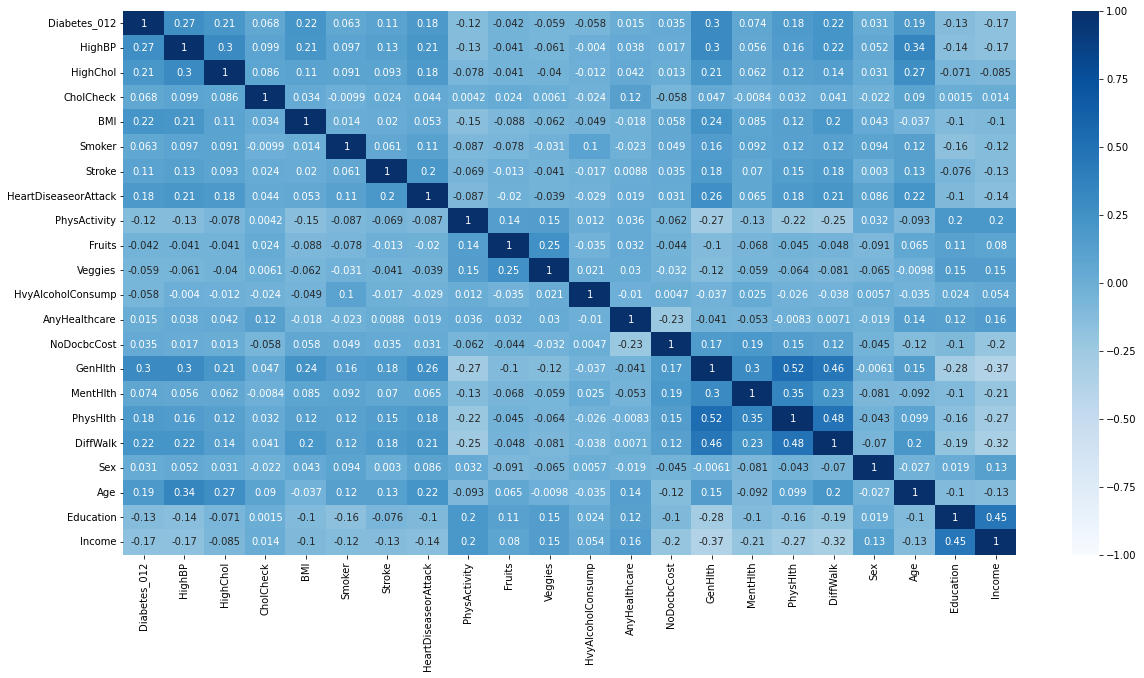

In [16]:
plt.figure(figsize=(20,10))
df_corr = df.corr()
ax = sns.heatmap(df_corr, cmap="Blues",annot=True, vmax=1, vmin=-1)
plt.show()

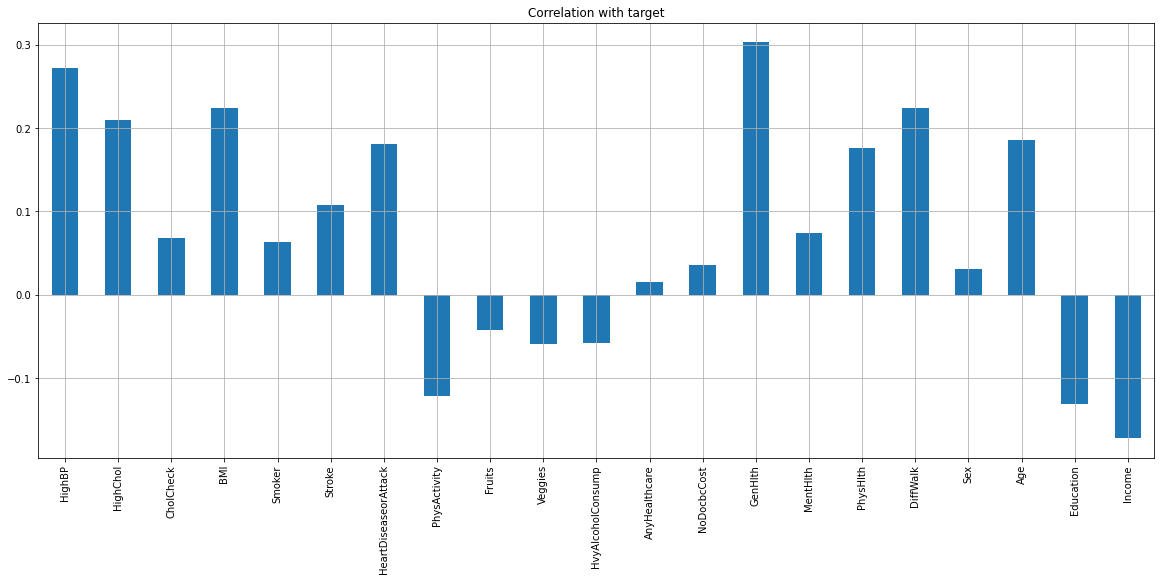

In [17]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target");

*   Correlation anaylsis would help us understand the relationship of all features with the target class, and thus tells us about importance of certain features.
The least important ones can be eliminated.
*   High correlation between certain features would helps us eliminate some of them, which would avoid the bias that can be introduced by features that are highly correlated with eachother

**OBSERVATION** <br>
*   No obvious highly correlated features against the target class.
*   AnyHealthCare, NoDocbcCost, Sex, Fruits, Veggies are least correlated features with target variable
*   Maximum correlation of High BP, High Cholestrol, BMI, GenHlth, DiffWalk against Target class is in range of 0.2-0.3, which is not too significant
*   DiffWalk, PhysHlth, MentlHlth are all positively correlated with GenHlth. So using only GenHlth as a feature in place of 4 similar features would reduce bias. Similarly, Income and Education are correlated features



## Data Pre-processing and cleaning

### Handle null/missing values

In [18]:
# checking if data has any invalid value like empty data, null, None etc
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
dtype: int64

**OBSERVATION** <br>

*   No missing or null values in data set.
*   No need for data imputataion or removal



### Remove Duplicate Data

In [19]:
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))

Duplicate Rows :  23899


In [20]:
# duplicate data would add unnecessary bias to our analysis, giving us feel of more occurences of certain type of data. So we can drop the duplicates from our data
df.drop_duplicates(inplace = True)
df.shape

(229781, 23)

### Outlier Analysis

Outliers can lead to model being trained on noisy data. Here we perform outlier analysis on BMI column by plotting a box plot below

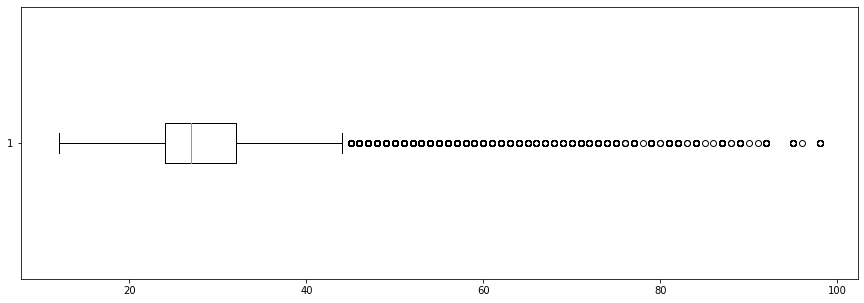

In [21]:
plt.figure(figsize=(15,5))
plt.boxplot(df["BMI"], vert=False)
plt.show()

In [22]:
def outlier_removal(df, features):
  print('Performing outlier removal from each column of dataframe')
  print('Initial Shape of df : {}'.format(df.shape))
  input_df = df.copy()

  for col in features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    input_df.drop( input_df[(input_df[col] < lower_bound) | (input_df[col] > upper_bound)].index, inplace=True)
  print('Final Shape of df : {}'.format(input_df.shape))
  print('\nDecrease in size of dataset : {} %'.format((1-input_df.shape[0]/df.shape[0])*100))
  return input_df

In [23]:
df_outlier_removed = outlier_removal(df, ['BMI'])

Performing outlier removal from each column of dataframe
Initial Shape of df : (229781, 23)
Final Shape of df : (224143, 23)

Decrease in size of dataset : 2.4536406404358946 %


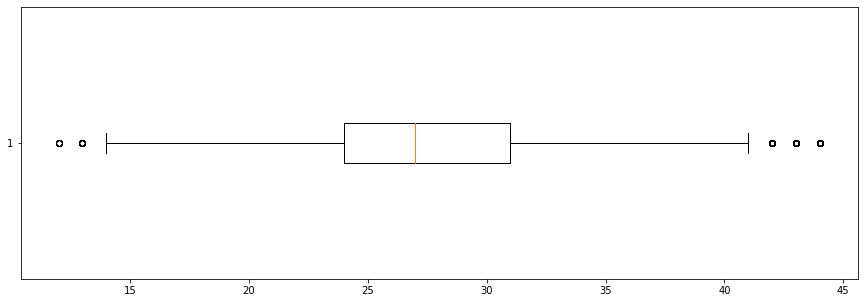

In [24]:
plt.figure(figsize=(15,5))
plt.boxplot(df_outlier_removed["BMI"], vert=False)
plt.show()

We have now got rid of outliers from BMI column with only reduction of ~2.5% of data

### Feature Selection

To learn the important features in our dataset, one way is to build a tree based model which would have more important features used for splitting criteria of tree early on. <br> Training a base decision tree classifier to extract some rules from our dataset

In [25]:
X = df.drop(['Diabetes_012','Diabetes'],axis=1)
y = df['Diabetes_012']

In [26]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234, max_depth=4)
model = clf.fit(X, y)

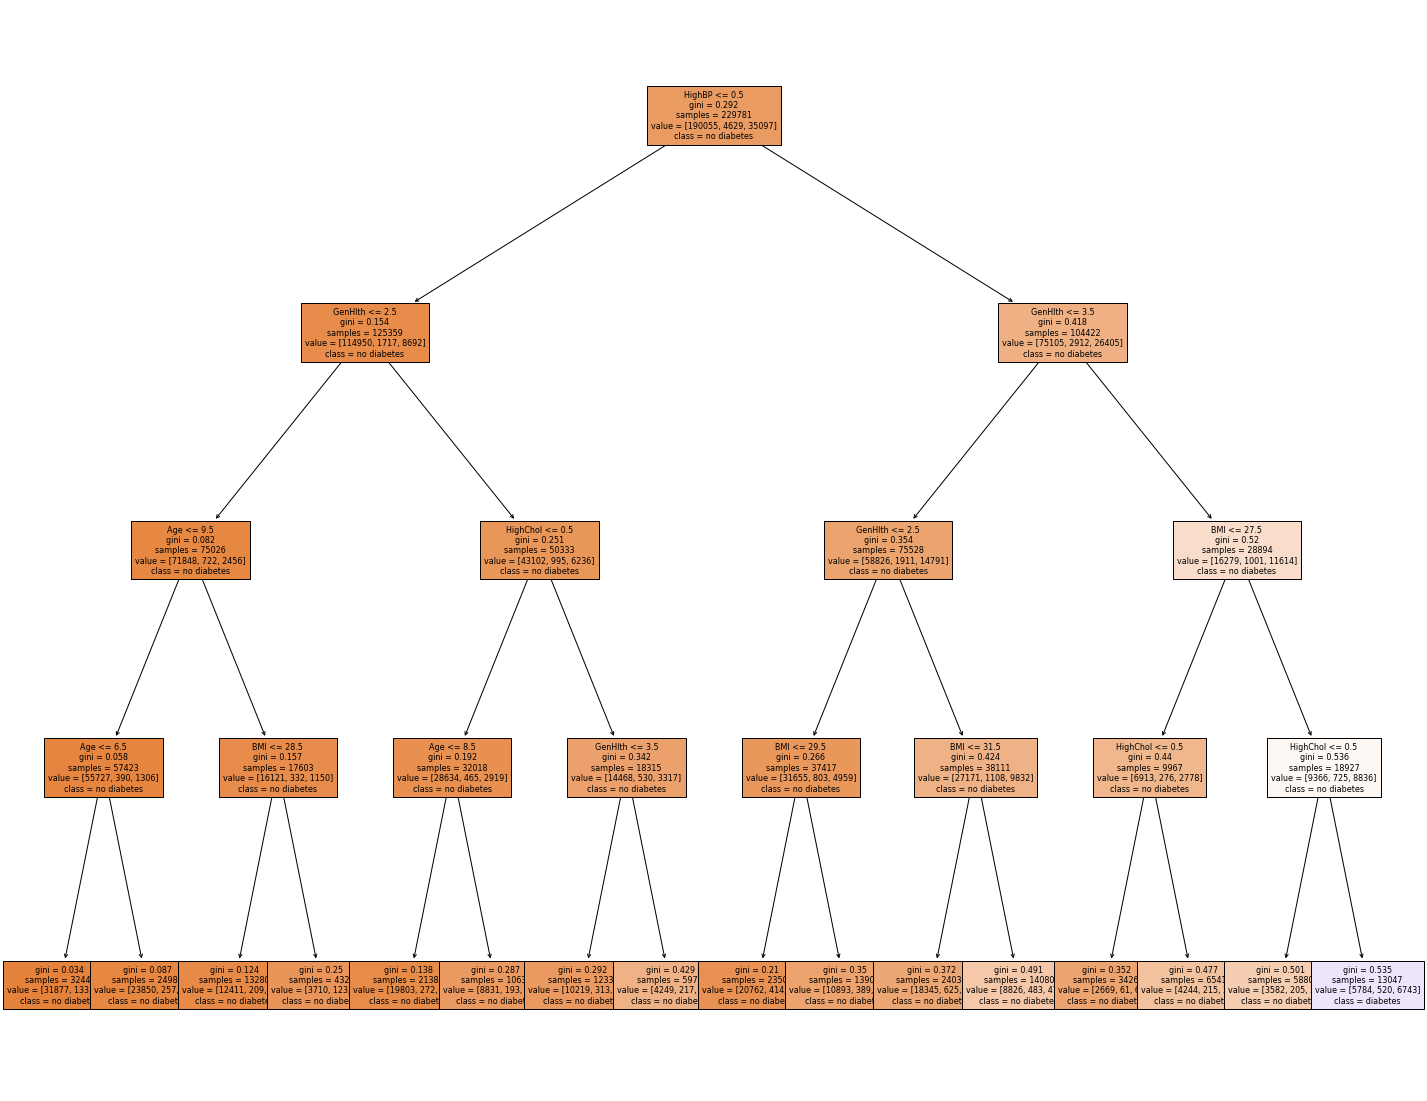

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['no diabetes', 'prediabetes', 'diabetes'], filled=True, fontsize=8)

HighBP, GenHlth, HighChol, BMI come out as more important features, which reiterates what we found in correlation analysis and solidifies observations we made earlier

In [28]:
# training the base model again but with larger depth value, to understand more about other features

clf = DecisionTreeClassifier(random_state=1234, max_depth=12)
model = clf.fit(X, y)

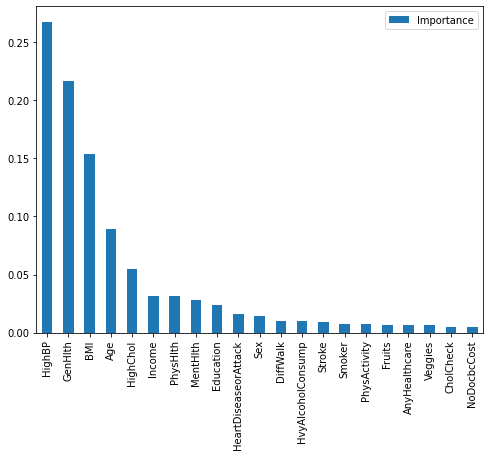

In [29]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

* We can deduce that HighBP, GenHlth, BMI, HighChol and Age are top 5 features ***which again matches our corrleation analysis and EDA performed earlier***.
* From Corrleation analysis earlier, we identified almost no relation between AnyHealthCare, NoDocbcCost, Veggies, Fruits and the target variable.
Thus dropping these features from our dataset.
* DiffWalk, PhysHlth, MentlHlth are similar features to GenHlth which is an important feature. Thus we can drop these features too.
* As we found in corelation analysis earlier, Income and Education are also correlated, thus we choose to drop Education too


In [30]:
df_selected_features = df_outlier_removed.drop([ 'AnyHealthcare','NoDocbcCost',
                                    'Veggies','Fruits','CholCheck', 
                                    'DiffWalk','PhysHlth','MentHlth',
                                    'Education', 'Diabetes'],axis=1)


In [31]:
list(df_selected_features.columns)

['Diabetes_012',
 'HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'HvyAlcoholConsump',
 'GenHlth',
 'Sex',
 'Age',
 'Income']

## Model Building

### Train/test Split

In [32]:
y = df_selected_features['Diabetes_012']
X = df_selected_features.drop(['Diabetes_012'],axis=1)

#### Handle Imbalance Data

In [33]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X, y)

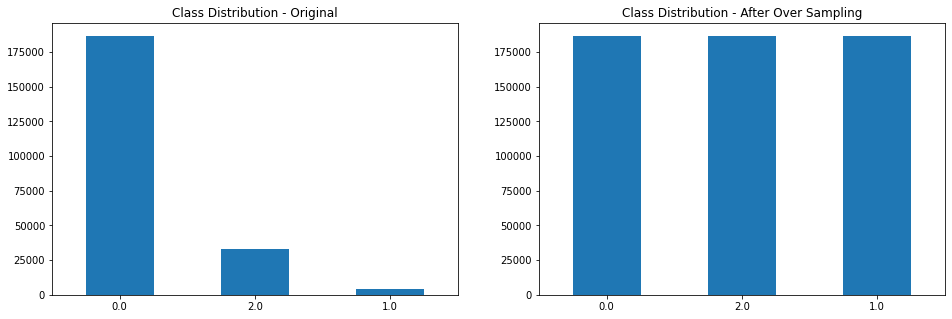

In [34]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
pd.value_counts(y).plot(kind='bar', title='Class Distribution - Original', rot=0)
plt.subplot(1,2,2)
pd.value_counts(y_oversample).plot(kind='bar', title='Class Distribution - After Over Sampling', rot=0)
plt.show()

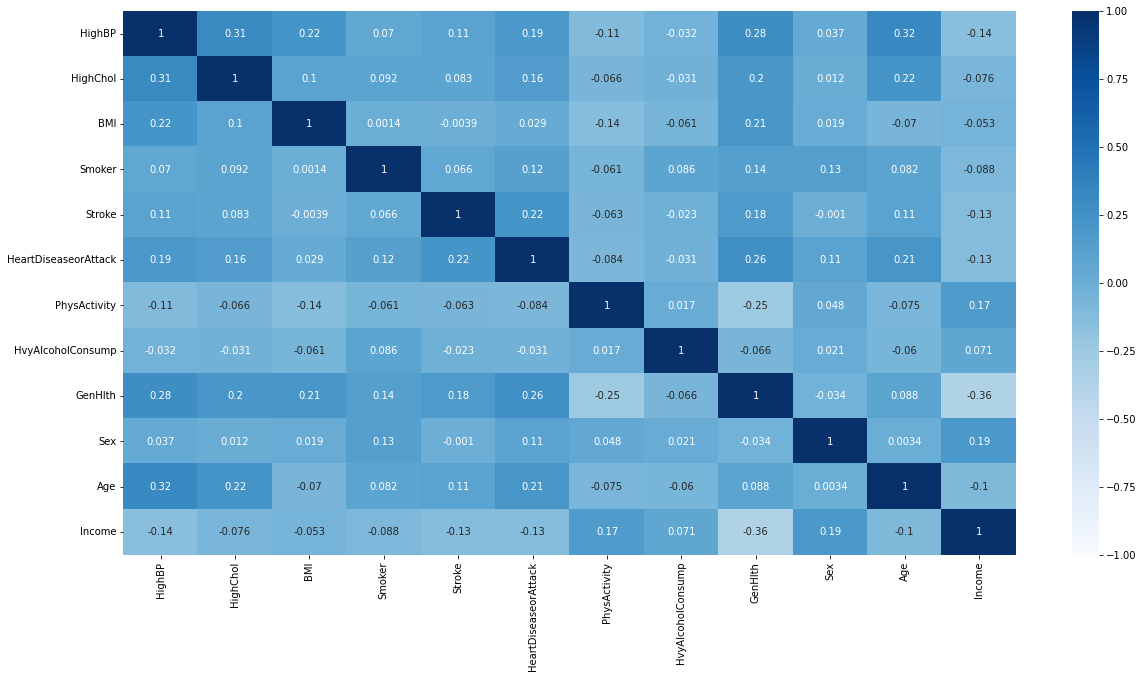

In [35]:
plt.figure(figsize=(20,10))
df_corr = X_oversample.corr()
ax = sns.heatmap(df_corr, cmap="Blues",annot=True, vmax=1, vmin=-1)
plt.show()

In [65]:
print('Number of rows BEFORE oversampling : {}'.format(df_selected_features.shape[0]))
print('Number of rows AFTER oversampling : {}'.format(X_oversample.shape[0]))

Number of rows BEFORE oversampling : 224143
Number of rows AFTER oversampling : 559767


#### Split

In [36]:
from sklearn.model_selection import train_test_split
# because the size of data is quite large, we can perform an 90:10 split of data between train and test set.
X_train,X_test,y_train,y_test = train_test_split(X_oversample,y_oversample,test_size=0.1,random_state=1)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(503790, 12)
(503790,)
(55977, 12)
(55977,)


#### Model Evaluation Function

In [38]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score

result_table = []

def evaluate(model, X_train, y_train, X_test, y_test, case, verbose=False):
    # check how the model performs of train and test set features
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    # saving the precision, recall, fscore and support of both training and test data set for later analysis
    precision, recall, fscore, support = score(y_train, y_train_pred)
    result_table.append([f'{case}-Train',(metrics.accuracy_score(y_train, y_train_pred)*100),precision, recall, fscore, support])
    precision, recall, fscore, support = score(y_test, y_pred)
    result_table.append([f'{case}-Test',(metrics.accuracy_score(y_test, y_pred)*100),precision, recall, fscore, support])

    if verbose:
      print("Train Accuracy: {} %".format(metrics.accuracy_score(y_train, y_train_pred)*100))
      print("Test Accuracy: {} %".format(metrics.accuracy_score(y_test, y_pred)*100))

      print("Train Confusion Matrix:")
      cf_train_matrix = metrics.confusion_matrix(y_train, y_train_pred)
      report = metrics.classification_report(y_train, y_train_pred)
      print(report)
      
      print("Test Confusion Matrix:")  
      report = metrics.classification_report(y_test, y_pred)
      print(report)

      cf_matrix = metrics.confusion_matrix(y_test, y_pred)    
      
      fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
      
      sns.heatmap(cf_train_matrix, annot=True, cmap='Blues', fmt='g', ax=ax1)
      ax1.set_title('Confusion Matrix - Train Data\n\n')
      ax1.set_xlabel('\nPredicted Values')
      ax1.set_ylabel('Actual Values ')
      
      sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax2)
      ax2.set_title('Confusion Matrix - Test Data\n\n')
      ax2.set_xlabel('\nPredicted Values')
      ax2.set_ylabel('Actual Values ')
      plt.tight_layout()
      plt.show()

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [40]:
# Create the random grid
random_grid = {'n_estimators': [50,100], # Number of trees in random forest
               'max_depth': [6,10,14,16,18], # Maximum number of levels in tree
               'min_samples_split': [15, 100], # Minimum number of samples required to split a node
               'random_state':[42]}
pprint(random_grid)

{'max_depth': [6, 10, 14, 16, 18],
 'min_samples_split': [15, 100],
 'n_estimators': [50, 100],
 'random_state': [42]}


In [41]:
# perform a grid search to find the optimal set of parameters for model training
rf = RandomForestClassifier()

rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, verbose=2, n_jobs=1, return_train_score=True)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=6, min_samples_split=15, n_estimators=50, random_state=42; total time=  17.3s
[CV] END max_depth=6, min_samples_split=15, n_estimators=50, random_state=42; total time=  16.1s
[CV] END max_depth=6, min_samples_split=15, n_estimators=50, random_state=42; total time=  16.0s
[CV] END max_depth=6, min_samples_split=15, n_estimators=50, random_state=42; total time=  15.7s
[CV] END max_depth=6, min_samples_split=15, n_estimators=50, random_state=42; total time=  16.5s
[CV] END max_depth=6, min_samples_split=15, n_estimators=100, random_state=42; total time=  31.1s
[CV] END max_depth=6, min_samples_split=15, n_estimators=100, random_state=42; total time=  32.0s
[CV] END max_depth=6, min_samples_split=15, n_estimators=100, random_state=42; total time=  31.5s
[CV] END max_depth=6, min_samples_split=15, n_estimators=100, random_state=42; total time=  32.2s
[CV] END max_depth=6, min_samples_split=15, n_estimators=100,

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [6, 10, 14, 16, 18],
                         'min_samples_split': [15, 100],
                         'n_estimators': [50, 100], 'random_state': [42]},
             return_train_score=True, verbose=2)

In [42]:
# checking the best estimator that comes out of our GridSearch
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(max_depth=18, min_samples_split=15, random_state=42)

Train Accuracy: 85.63171162587587 %
Test Accuracy: 83.4825017417868 %
Train Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86    167962
         1.0       0.91      0.91      0.91    167716
         2.0       0.80      0.80      0.80    168112

    accuracy                           0.86    503790
   macro avg       0.86      0.86      0.86    503790
weighted avg       0.86      0.86      0.86    503790

Test Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     18627
         1.0       0.89      0.90      0.89     18873
         2.0       0.77      0.76      0.77     18477

    accuracy                           0.83     55977
   macro avg       0.83      0.83      0.83     55977
weighted avg       0.83      0.83      0.83     55977



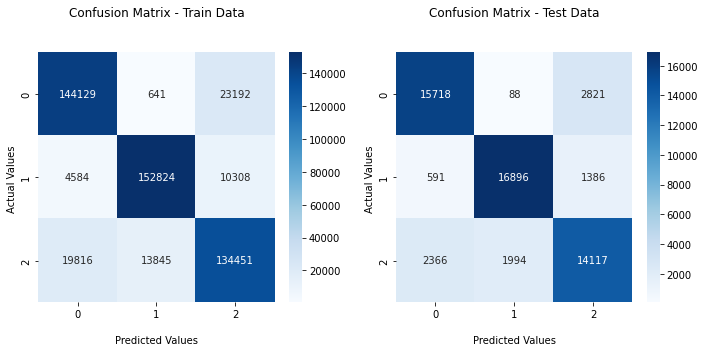

In [43]:
# get model evaluation metrics
evaluate(best_random, X_train, y_train, X_test, y_test, 'RF-GridCVBest', verbose=True)

100%|██████████| 8/8 [12:22<00:00, 92.80s/it] 


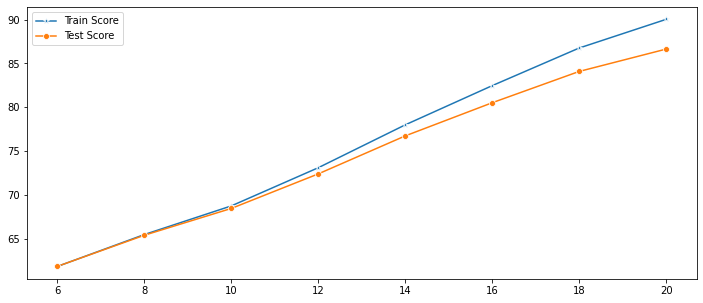

In [44]:
# to further understand the scenarios for overfitting or underfitting of model, we train the model again on various tree max tree depth and store training and test scores
from tqdm import tqdm

accuracy = []
for depth in tqdm(range(6,22,2)):
  base_model = RandomForestClassifier(n_estimators = 100, max_depth = depth,random_state = 42)
  base_model.fit(X_train, y_train)
  y_train_pred = base_model.predict(X_train)
  y_pred = base_model.predict(X_test)

  train_accuracy = metrics.accuracy_score(y_train, y_train_pred)*100
  test_accuracy = metrics.accuracy_score(y_test, y_pred)*100

  accuracy.append({'train_accuracy': train_accuracy,
                  'test_accuracy' : test_accuracy,
                  'max_depth': depth})

  evaluate(base_model, X_train, y_train, X_test, y_test, 'RF-TreeDepth{}'.format(depth))

train_scores = [ sub['train_accuracy'] for sub in accuracy ]
test_scores = [ sub['test_accuracy'] for sub in accuracy ]

plt.figure(figsize=(12,5))
p = sns.lineplot(range(6,22,2),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(6,22,2),test_scores,marker='o',label='Test Score')

* Above plot shows patterns of train and test accuracies of random forest model on various values of max_depth feature.
* The train and test accuracies keep increasing with larger value of depth, but the difference between them also keeps increasing
* With the test accuracy lagging behind train accuracy for larger tree in random forest model, we can assume chances of model getting overfitted on training data and thus performing poorly on unseen test data
* So out of these we can pick **model with max depth as 16**, where **train and test scores are 82% and 80%** respectively


### KNN

Train Accuracy: 88.95253974870482 %
Test Accuracy: 84.69192704146346 %
Train Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84    167962
         1.0       0.92      0.98      0.95    167716
         2.0       0.86      0.91      0.88    168112

    accuracy                           0.89    503790
   macro avg       0.89      0.89      0.89    503790
weighted avg       0.89      0.89      0.89    503790

Test Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.85      0.70      0.77     18627
         1.0       0.89      0.96      0.93     18873
         2.0       0.80      0.87      0.84     18477

    accuracy                           0.85     55977
   macro avg       0.85      0.85      0.84     55977
weighted avg       0.85      0.85      0.84     55977



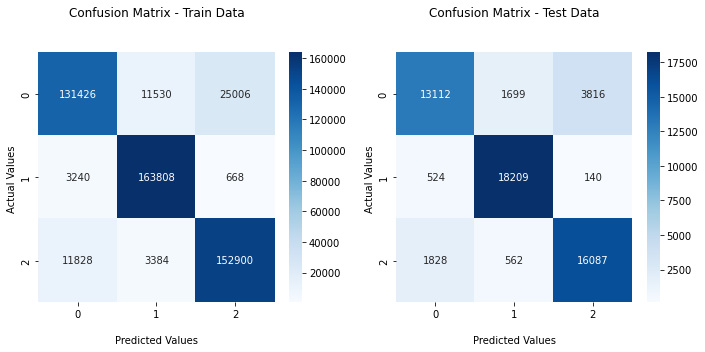

In [45]:
# training a base KNN model with all default values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
knn_base_clf = KNeighborsClassifier()
knn_base_clf.fit(X_train, y_train)
evaluate(knn_base_clf, X_train, y_train, X_test, y_test, 'KNN-Base', verbose=True)

In [46]:
#List Hyperparameters that we want to tune
random_grid = {'leaf_size': list(range(30,50,5)),
               'n_neighbors': list(range(1,10,2)),
               'p': [1,2]}
pprint(random_grid)

{'leaf_size': [30, 35, 40, 45], 'n_neighbors': [1, 3, 5, 7, 9], 'p': [1, 2]}


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...................leaf_size=30, n_neighbors=1, p=1; total time=  15.3s
[CV] END ...................leaf_size=30, n_neighbors=1, p=1; total time=  15.7s
[CV] END ...................leaf_size=30, n_neighbors=1, p=1; total time=  15.4s
[CV] END ...................leaf_size=30, n_neighbors=1, p=1; total time=  14.7s
[CV] END ...................leaf_size=30, n_neighbors=1, p=1; total time=  14.8s
[CV] END ...................leaf_size=30, n_neighbors=1, p=2; total time=  12.8s
[CV] END ...................leaf_size=30, n_neighbors=1, p=2; total time=  13.8s
[CV] END ...................leaf_size=30, n_neighbors=1, p=2; total time=  13.3s
[CV] END ...................leaf_size=30, n_neighbors=1, p=2; total time=  13.0s
[CV] END ...................leaf_size=30, n_neighbors=1, p=2; total time=  12.7s
[CV] END ...................leaf_size=30, n_neighbors=3, p=1; total time=  22.4s
[CV] END ...................leaf_size=30, n_nei

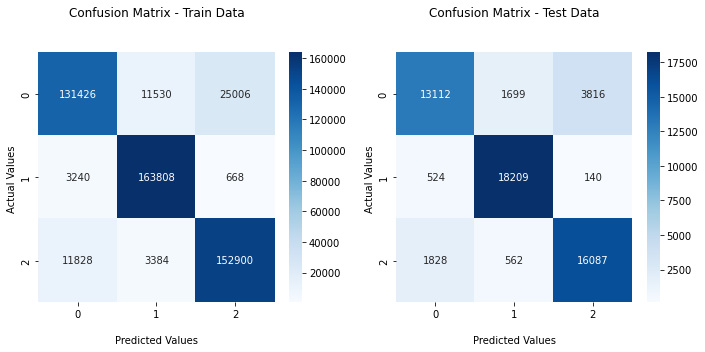

In [47]:
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, random_grid, verbose=2)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
evaluate(best_model, X_train, y_train, X_test, y_test, 'KNN-GridCVBest', verbose=True)


Train Accuracy: 96.16328232001429 %
Test Accuracy: 87.80570591492935 %
Train Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94    167962
         1.0       0.99      0.99      0.99    167716
         2.0       0.95      0.95      0.95    168112

    accuracy                           0.96    503790
   macro avg       0.96      0.96      0.96    503790
weighted avg       0.96      0.96      0.96    503790

Test Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83     18627
         1.0       0.96      0.96      0.96     18873
         2.0       0.84      0.84      0.84     18477

    accuracy                           0.88     55977
   macro avg       0.88      0.88      0.88     55977
weighted avg       0.88      0.88      0.88     55977



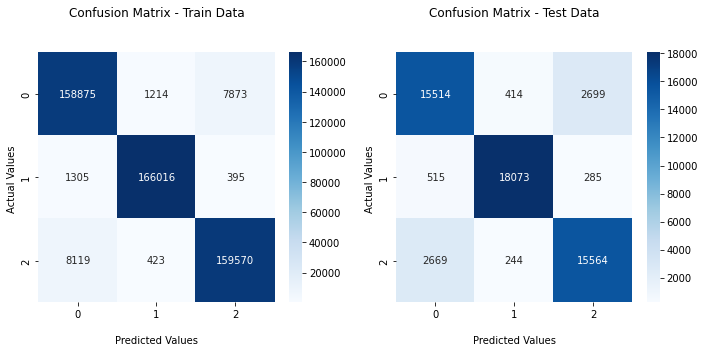

In [58]:
evaluate(best_model, X_train, y_train, X_test, y_test, 'KNN-GridCVBest', verbose=True)

## Performance Evaluation

In [59]:
from tabulate import tabulate
print(tabulate(result_table, headers=['Case','Accuracy %', 'Precision', 'Recall', 'F1 Score', 'Support']))

Case                    Accuracy %  Precision                           Recall                              F1 Score                            Support
--------------------  ------------  ----------------------------------  ----------------------------------  ----------------------------------  ----------------------
RF-GridCVBest-Train        85.6317  [0.8552178  0.91341821 0.80053706]  [0.85810481 0.91120704 0.79977039]  [0.85665887 0.91231128 0.80015354]  [167962 167716 168112]
RF-GridCVBest-Test         83.4825  [0.84165997 0.89029402 0.77041039]  [0.84382885 0.89524718 0.76403096]  [0.84274302 0.89276373 0.76720741]  [18627 18873 18477]
RF-TreeDepth6-Train        61.848   [0.70025077 0.64764868 0.51866994]  [0.74814541 0.52988981 0.57731155]  [0.72340622 0.58288105 0.54642191]  [167962 167716 168112]
RF-TreeDepth6-Test         61.8558  [0.69882009 0.65538724 0.51550536]  [0.74402749 0.52953955 0.58299507]  [0.72071557 0.58578043 0.547177  ]  [18627 18873 18477]
RF-TreeDepth8-Train

In the above table we have results for all the models we tried in this problem.
<br>
Lets analyze our models, 

1.   From the Random Forest models of various tree depths (6 to 20), owning to low performace of models with lesser depth and poor performance on test data for models with tree depth larger than 16. We earlier chose  ***model with max depth as 16***, where train and test scores are ***82% and 80%***

2.   Random Forest model with parameters found by GridSearchCV, ***max_depth=18, min_samples_split=15***, gives train and test accuracy of ***85% and 83%*** respectively. This difference in train-test accuracy is comparable to model discussed in point 1, and has better precision, recall and f1 scores.

3.  KNN base model trained on default params (***n_neighbors=5, leaf_size=30, p=2***) gave train-test accuracies as ***88% and 84%*** respectively and better overall precision, recall and f1 scores than above discussed models

4. KNN model with best estimators from GridSearchCV (***n_neighbors=1, leaf_size=30, p=1***), has very high train accuracy of *96%*, but sees a drop on test accuracy (***87%***). So this model may fail to generalize well and looks to be overfitted for the training data.


Thus KNN model with **n_neighbors=5, leaf_size=30, p=2**, comes out to be better than other models with train-test accuracy comparison and better precision, recall and f1 scores











